In [1]:
import os
# Find the latest version of spark 3.2 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
spark_version = 'spark-3.4.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()


from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc, when
spark = SparkSession.builder.appName("BankChurners").getOrCreate()


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [2]:
# Read in data from S3 Buckets
from pyspark import SparkFiles

url = "https://groupfourproject.s3.ca-central-1.amazonaws.com/bank_churners.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("bank_churners.csv"), header=True, sep=',', inferSchema=True)

# Show the DataFrame
df.show()


+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [3]:
#Displaying Column Type
df.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [4]:
#Dropping duplicates within the dataframe
df.dropDuplicates().show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [5]:
#Drooping NA in the dataframe
df.na.drop(how='all')

#Display DataFrame
df.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [6]:
#Dropping columns in DataFrame
credit_df= df.drop('CLIENTNUM',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')

#Displaying DataFrame
credit_df.show()


+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+--------

In [7]:
#Create a temporary view
credit_df.createOrReplaceTempView("bank")

**Demographic Data to Analyze**

**Gender**

In [8]:
gender = spark.sql("""
SELECT
  Attrition_Flag as Flag,
  Gender,
  COUNT(Attrition_Flag) as Count
FROM
  bank
WHERE
  Gender IN ('F', 'M')
GROUP BY
  Attrition_Flag,
  Gender
""")

gender.show()

gendercount = spark.sql("""
SELECT
  Attrition_Flag as Flag,
  COUNT(*) as Count
FROM
  bank
WHERE
  Gender IN ('F', 'M')
GROUP BY
  Attrition_Flag
""")

gendercount.show()




+-----------------+------+-----+
|             Flag|Gender|Count|
+-----------------+------+-----+
|Existing Customer|     F| 4428|
|Attrited Customer|     F|  930|
|Existing Customer|     M| 4072|
|Attrited Customer|     M|  697|
+-----------------+------+-----+

+-----------------+-----+
|             Flag|Count|
+-----------------+-----+
|Existing Customer| 8500|
|Attrited Customer| 1627|
+-----------------+-----+



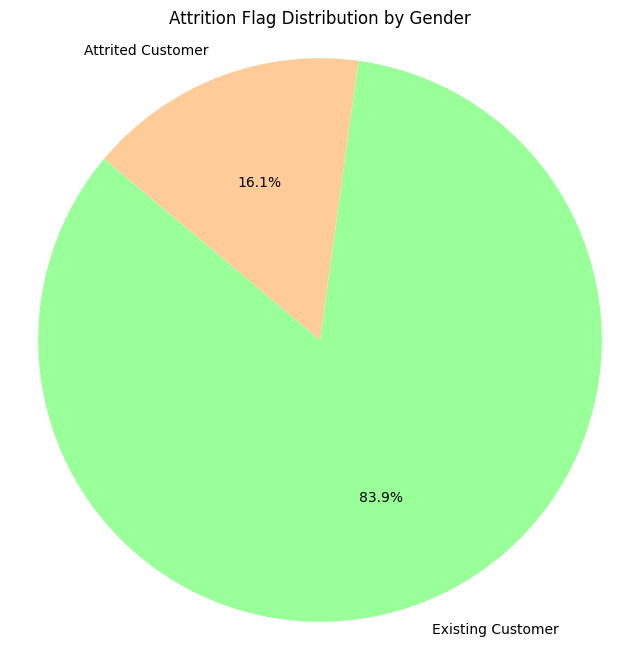

In [9]:
import matplotlib.pyplot as plt

gendercount_pandas = gendercount.toPandas()

# Extract data for the pie chart
labels = gendercount_pandas['Flag']
sizes = gendercount_pandas['Count']

# Define custom colors
colors = ['#99ff99','#ffcc99']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Attrition Flag Distribution by Gender")
plt.show()

**Dependent Count**

In [10]:
dependent_count= spark.sql("""
SELECT
  Attrition_Flag as Flag,
  COUNT(*) as DependentCount,
  CASE
    WHEN Dependent_count BETWEEN 0 AND 5 THEN '0-5'
    ELSE 'Other'
  END AS DependentRange
FROM
  bank
GROUP BY
  Attrition_Flag,
  CASE
    WHEN Dependent_count BETWEEN 0 AND 5 THEN '0-5'
    ELSE 'Other'
  END
ORDER BY
  DependentRange
""")
dependent_count.show()

+-----------------+--------------+--------------+
|             Flag|DependentCount|DependentRange|
+-----------------+--------------+--------------+
|Attrited Customer|          1627|           0-5|
|Existing Customer|          8500|           0-5|
+-----------------+--------------+--------------+



**Education**

In [11]:
education = spark.sql("""
SELECT
  Attrition_Flag as Flag,
  Education_Level as Education,
  COUNT(Education_Level) as EducationCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Education_Level
ORDER BY
  Flag
""")
education.show()

+-----------------+-------------+--------------+
|             Flag|    Education|EducationCount|
+-----------------+-------------+--------------+
|Attrited Customer|  High School|           306|
|Attrited Customer|     Graduate|           487|
|Attrited Customer|      Unknown|           256|
|Attrited Customer|Post-Graduate|            92|
|Attrited Customer|      College|           154|
|Attrited Customer|   Uneducated|           237|
|Attrited Customer|    Doctorate|            95|
|Existing Customer|  High School|          1707|
|Existing Customer|Post-Graduate|           424|
|Existing Customer|    Doctorate|           356|
|Existing Customer|     Graduate|          2641|
|Existing Customer|   Uneducated|          1250|
|Existing Customer|      Unknown|          1263|
|Existing Customer|      College|           859|
+-----------------+-------------+--------------+



**Income Category**

In [12]:
income = spark.sql("""
SELECT
  Attrition_Flag as Flag,
  Income_Category as Income,
  COUNT(*) as IncomeCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Income_Category
ORDER BY
  Income
""")

income.show()

+-----------------+--------------+-----------+
|             Flag|        Income|IncomeCount|
+-----------------+--------------+-----------+
|Attrited Customer|       $120K +|        126|
|Existing Customer|       $120K +|        601|
|Existing Customer|   $40K - $60K|       1519|
|Attrited Customer|   $40K - $60K|        271|
|Existing Customer|   $60K - $80K|       1213|
|Attrited Customer|   $60K - $80K|        189|
|Existing Customer|  $80K - $120K|       1293|
|Attrited Customer|  $80K - $120K|        242|
|Existing Customer|Less than $40K|       2949|
|Attrited Customer|Less than $40K|        612|
|Attrited Customer|       Unknown|        187|
|Existing Customer|       Unknown|        925|
+-----------------+--------------+-----------+



**Behavioral (Bank) Data**

**Months on book**

In [13]:
month_book = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Months_on_book as Months,
  COUNT(*) as MonthsCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Months_on_book
ORDER BY
 Months
""")
month_book.show()

+-----------------+------+-----------+
|             Flag|Months|MonthsCount|
+-----------------+------+-----------+
|Existing Customer|    13|         63|
|Attrited Customer|    13|          7|
|Existing Customer|    14|         15|
|Attrited Customer|    14|          1|
|Existing Customer|    15|         25|
|Attrited Customer|    15|          9|
|Existing Customer|    16|         26|
|Attrited Customer|    16|          3|
|Attrited Customer|    17|          4|
|Existing Customer|    17|         35|
|Attrited Customer|    18|         13|
|Existing Customer|    18|         45|
|Attrited Customer|    19|          6|
|Existing Customer|    19|         57|
|Attrited Customer|    20|         13|
|Existing Customer|    20|         61|
|Attrited Customer|    21|         10|
|Existing Customer|    21|         73|
|Attrited Customer|    22|         20|
|Existing Customer|    22|         85|
+-----------------+------+-----------+
only showing top 20 rows



**Total Relationsip Count**

In [14]:
total_relationship = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Total_Relationship_Count as TotalRelationship,
  COUNT(*) as MonthsCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Total_Relationship_Count
ORDER BY
  TotalRelationship
""")
total_relationship.show()

+-----------------+-----------------+-----------+
|             Flag|TotalRelationship|MonthsCount|
+-----------------+-----------------+-----------+
|Existing Customer|                1|        677|
|Attrited Customer|                1|        233|
|Existing Customer|                2|        897|
|Attrited Customer|                2|        346|
|Attrited Customer|                3|        400|
|Existing Customer|                3|       1905|
|Attrited Customer|                4|        225|
|Existing Customer|                4|       1687|
|Existing Customer|                5|       1664|
|Attrited Customer|                5|        227|
|Existing Customer|                6|       1670|
|Attrited Customer|                6|        196|
+-----------------+-----------------+-----------+



**Months Inactive 12 months**

In [15]:
months_inactive = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Months_Inactive_12_mon as MonthsInactive,
  COUNT(*) as InactiveCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Months_Inactive_12_mon
ORDER BY
  MonthsInactive
""")
months_inactive.show()

+-----------------+--------------+-------------+
|             Flag|MonthsInactive|InactiveCount|
+-----------------+--------------+-------------+
|Existing Customer|             0|           14|
|Attrited Customer|             0|           15|
|Existing Customer|             1|         2133|
|Attrited Customer|             1|          100|
|Existing Customer|             2|         2777|
|Attrited Customer|             2|          505|
|Attrited Customer|             3|          826|
|Existing Customer|             3|         3020|
|Attrited Customer|             4|          130|
|Existing Customer|             4|          305|
|Existing Customer|             5|          146|
|Attrited Customer|             5|           32|
|Existing Customer|             6|          105|
|Attrited Customer|             6|           19|
+-----------------+--------------+-------------+



**Contacts Count 12 months**

In [16]:
contacts = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Contacts_Count_12_mon as Contact,
  COUNT(*) as MonthsCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Contacts_Count_12_mon
ORDER BY
  Contact
""")
contacts.show()

+-----------------+-------+-----------+
|             Flag|Contact|MonthsCount|
+-----------------+-------+-----------+
|Existing Customer|      0|        392|
|Attrited Customer|      0|          7|
|Existing Customer|      1|       1391|
|Attrited Customer|      1|        108|
|Existing Customer|      2|       2824|
|Attrited Customer|      2|        403|
|Attrited Customer|      3|        681|
|Existing Customer|      3|       2699|
|Attrited Customer|      4|        315|
|Existing Customer|      4|       1077|
|Existing Customer|      5|        117|
|Attrited Customer|      5|         59|
|Attrited Customer|      6|         54|
+-----------------+-------+-----------+



**Credit Limit**

In [17]:
credit = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Credit_Limit as CreditLimit,
  COUNT(*) as CreditCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Credit_Limit
ORDER BY
  CreditCount
""")
credit.show()

+-----------------+-----------+-----------+
|             Flag|CreditLimit|CreditCount|
+-----------------+-----------+-----------+
|Existing Customer|    23665.0|          1|
|Existing Customer|    12932.0|          1|
|Attrited Customer|     1491.0|          1|
|Existing Customer|    14035.0|          1|
|Attrited Customer|    11422.0|          1|
|Existing Customer|     4844.0|          1|
|Existing Customer|     4135.0|          1|
|Existing Customer|     5478.0|          1|
|Attrited Customer|     2066.0|          1|
|Existing Customer|     1525.0|          1|
|Existing Customer|     6966.0|          1|
|Existing Customer|    19999.0|          1|
|Existing Customer|    18379.0|          1|
|Existing Customer|     5443.0|          1|
|Existing Customer|     7264.0|          1|
|Existing Customer|     7112.0|          1|
|Existing Customer|     1671.0|          1|
|Existing Customer|     5585.0|          1|
|Attrited Customer|     5557.0|          1|
|Existing Customer|    25666.0| 

**Total Trans Amt**

In [18]:
total_amt = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Total_Trans_Amt as TotalTrans,
  COUNT(*) as TransCount
FROM
  bank
GROUP BY
  Attrition_Flag,
  Total_Trans_Amt
ORDER BY
  TotalTrans
""")
total_amt.show()

+-----------------+----------+----------+
|             Flag|TotalTrans|TransCount|
+-----------------+----------+----------+
|Attrited Customer|       510|         1|
|Attrited Customer|       530|         1|
|Attrited Customer|       563|         1|
|Attrited Customer|       569|         1|
|Attrited Customer|       594|         1|
|Attrited Customer|       596|         1|
|Attrited Customer|       597|         1|
|Attrited Customer|       602|         1|
|Attrited Customer|       615|         1|
|Attrited Customer|       643|         1|
|Attrited Customer|       644|         1|
|Attrited Customer|       646|         1|
|Attrited Customer|       647|         2|
|Attrited Customer|       654|         1|
|Attrited Customer|       660|         1|
|Attrited Customer|       673|         1|
|Attrited Customer|       678|         1|
|Attrited Customer|       683|         1|
|Attrited Customer|       687|         1|
|Attrited Customer|       689|         1|
+-----------------+----------+----

**Total Trans Count**

In [19]:
total_count = spark.sql("""SELECT
  Attrition_Flag as Flag,
  Total_Trans_Ct as TotalTransCount,
  COUNT(*) as CountTotalTrans
FROM
  bank
GROUP BY
  Attrition_Flag,
  Total_Trans_Ct
ORDER BY
  CountTotalTrans
""")
total_count.show()


+-----------------+---------------+---------------+
|             Flag|TotalTransCount|CountTotalTrans|
+-----------------+---------------+---------------+
|Existing Customer|            132|              1|
|Existing Customer|            134|              1|
|Existing Customer|            139|              1|
|Existing Customer|            138|              1|
|Attrited Customer|             86|              1|
|Attrited Customer|             11|              1|
|Existing Customer|             11|              1|
|Attrited Customer|             83|              1|
|Attrited Customer|             94|              1|
|Attrited Customer|             91|              1|
|Existing Customer|             14|              1|
|Existing Customer|             13|              2|
|Attrited Customer|             89|              2|
|Attrited Customer|             90|              3|
|Existing Customer|             17|              3|
|Attrited Customer|             13|              3|
|Attrited Cu

In [20]:
from pyspark.sql import functions as F
from pyspark.sql import types as T


#Gives a label to each category
#creates onehot encoding vector
from pyspark.ml.feature import StringIndexer, OneHotEncoder

#Used to creat vector from features and modeling takes vector as an input
from pyspark.ml.feature import VectorAssembler

#Used for classification problems
from pyspark.ml.classification import DecisionTreeClassifier


In [21]:
#Maniplating Attrition_Flag to 0= Attrited Customer and 1= Existing Customer
attrition_df = credit_df.withColumn("Attrition_Flag", F.when(F.col("Attrition_Flag") =='Attrited Customer', 0).otherwise(1))

#Displaying DataFrame
attrition_df.show(3, truncate=False)

#Displaying count of Attrition_Flag
attrition_df.groupby("Attrition_Flag").count().show()


+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+
|Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-----------------

**1st Modeling**

In [22]:
(attrited_train_df, attrited_test_df) = attrition_df.randomSplit([0.8, 0.2], 11)
print("Number of train samples: " + str(attrited_train_df.count()))
print("Number of test samples: " + str(attrited_test_df.count()))

Number of train samples: 8102
Number of test samples: 2025


In [23]:
# Apply StringIndexer to the Attrition_Flag column
attrition_indexer = StringIndexer(inputCol="Attrition_Flag", outputCol="Attrition_Flag_Index")
attrition_indexer = attrition_indexer.fit(attrited_train_df)
attrited_train_df = attrition_indexer.transform(attrited_train_df)

# Show the transformed DataFrame
attrited_train_df.show(3, truncate=False)

+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+--------------------+
|Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Attrition_Flag_Index|
+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+------

In [24]:
attrited_inputCols=[
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio'
    ]

attrited_outputCol="features"

vector_assembler = VectorAssembler(inputCols= attrited_inputCols, outputCol=attrited_outputCol )
attrited_train_df = vector_assembler.transform(attrited_train_df)

In [25]:
attrited_train_df.show(3, truncate=False)

+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+--------------------+-----------------------------------------------------------------------+
|Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Attrition_Flag_Index|features                                                               |
+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+--

In [26]:
#Modeling dataframe for Attrition_Flag
attrited_modeling_df = attrited_train_df.select('features', 'Attrition_Flag')

#Displaying DataFrame
attrited_modeling_df.show()


+--------------------+--------------+
|            features|Attrition_Flag|
+--------------------+--------------+
|[0.0,13.0,2.0,2.0...|             0|
|[0.0,13.0,1.0,2.0...|             0|
|[0.0,15.0,3.0,2.0...|             0|
|[0.0,20.0,3.0,2.0...|             0|
|[0.0,13.0,5.0,2.0...|             0|
|[0.0,16.0,6.0,1.0...|             0|
|[0.0,36.0,2.0,3.0...|             0|
|[1.0,36.0,4.0,2.0...|             0|
|[0.0,19.0,2.0,1.0...|             0|
|[1.0,36.0,3.0,2.0...|             0|
|[1.0,17.0,5.0,1.0...|             0|
|[0.0,36.0,5.0,3.0...|             0|
|[0.0,22.0,1.0,2.0...|             0|
|[0.0,13.0,3.0,1.0...|             0|
|[1.0,36.0,2.0,2.0...|             0|
|[1.0,18.0,4.0,1.0...|             0|
|[1.0,19.0,6.0,1.0...|             0|
|[0.0,24.0,6.0,2.0...|             0|
|[0.0,23.0,6.0,2.0...|             0|
|[1.0,19.0,4.0,3.0...|             0|
+--------------------+--------------+
only showing top 20 rows



In [27]:
#Creating a DecisionTreeClassifier model
model_attrition = DecisionTreeClassifier(labelCol="Attrition_Flag", featuresCol="features")


#Train model with traing data
model_attrition = model_attrition.fit(attrited_modeling_df)



In [28]:
prediction = model_attrition.transform(attrited_modeling_df)
prediction.show()

+--------------------+--------------+--------------+--------------------+----------+
|            features|Attrition_Flag| rawPrediction|         probability|prediction|
+--------------------+--------------+--------------+--------------------+----------+
|[0.0,13.0,2.0,2.0...|             0|  [121.0,25.0]|[0.82876712328767...|       0.0|
|[0.0,13.0,1.0,2.0...|             0|  [525.0,74.0]|[0.87646076794657...|       0.0|
|[0.0,15.0,3.0,2.0...|             0|[103.0,1198.0]|[0.07916986933128...|       1.0|
|[0.0,20.0,3.0,2.0...|             0|  [525.0,74.0]|[0.87646076794657...|       0.0|
|[0.0,13.0,5.0,2.0...|             0|[103.0,1198.0]|[0.07916986933128...|       1.0|
|[0.0,16.0,6.0,1.0...|             0|[103.0,1198.0]|[0.07916986933128...|       1.0|
|[0.0,36.0,2.0,3.0...|             0|  [22.0,966.0]|[0.02226720647773...|       1.0|
|[1.0,36.0,4.0,2.0...|             0|  [525.0,74.0]|[0.87646076794657...|       0.0|
|[0.0,19.0,2.0,1.0...|             0|  [121.0,25.0]|[0.8287671232

In [29]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Attrition_Flag")

accuracy = evaluator.evaluate(prediction, {evaluator.metricName: 'accuracy'})
f1 = evaluator.evaluate(prediction, {evaluator.metricName: 'f1'})
recall = evaluator.evaluate(prediction, {evaluator.metricName: 'recallByLabel'})
precision = evaluator.evaluate(prediction, {evaluator.metricName: 'precisionByLabel'})

print(f"The Precision for 1st Train Prediction: {precision}")
print(f"The F1 for 1st Train Prediction: {f1}")
print(f"The Recall for 1st Train Prediction: {recall}")
print(f"The Accuracy for 1st Train Prediction: {accuracy}")

The Precision for 1st Train Prediction: 0.8013698630136986
The F1 for 1st Train Prediction: 0.9373021145127812
The Recall for 1st Train Prediction: 0.8093774019984628
The Accuracy for 1st Train Prediction: 0.937176005924463


**1st Test Prediction**

In [30]:
#Test data- transform train test data using all tranformers and estimators in order

attrited_test_df = attrition_indexer.transform(attrited_test_df)
attrited_test_df = vector_assembler.transform(attrited_test_df)
test_predications =  model_attrition.transform(attrited_test_df)

test_predications.show(3, truncate=False)

+--------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+--------------------+----------------------------------------------------------------------+-------------+----------------------------------------+----------+
|Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Attrition_Flag_Index|features                                                              |rawPrediction|probability                             |prediction|


In [31]:
evaluator = MulticlassClassificationEvaluator(labelCol="Attrition_Flag")

accuracy = evaluator.evaluate(test_predications, {evaluator.metricName: 'accuracy'})
f1 = evaluator.evaluate(test_predications, {evaluator.metricName: 'f1'})
recall = evaluator.evaluate(test_predications, {evaluator.metricName: 'recallByLabel'})
precision = evaluator.evaluate(test_predications, {evaluator.metricName: 'precisionByLabel'})

print(f"The Precision for 1st Test Prediction: {precision}")
print(f"The F1 for 1st Test Prediction: {f1}")
print(f"The Recall for 1st Test Prediction: {recall}")
print(f"The Accuracy for 1st Test Prediction: {accuracy}")



The Precision for 1st Test Prediction: 0.798219584569733
The F1 for 1st Test Prediction: 0.9386834425940117
The Recall for 1st Test Prediction: 0.8251533742331288
The Accuracy for 1st Test Prediction: 0.9382716049382716
